# Martingales

## Setup

In [1]:
%pip install matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


## Proof

A **Martingale** is a stochastic process where the expected future value is equal to that of the current value. Discounted stock price under **risk-neutral** probability is proven to be a martingale. First, we will do proof below. The tilde on top of any symbol below such as $\tilde{\mathbb{E}}$ denotes that a risk-neutral probability is being used. The symbol $\mathbb{E}_n$ denotes the expected outcome based on known information at time $n$.

$$ \textrm{The discounted stock price at time } n \textrm{ is defined as } \frac{S_n}{(1 + r)^n}$$
$$\textrm{For this to be a martingale the follwing would have to hold: } \frac{S_n}{(1 + r)^n} = \tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}]$$
$$\textrm{ So, below will be the proof:}$$
$$\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \tilde{\mathbb{E}_n}[\frac{S_n}{(1 + r)^{n+1}} * \frac{S_{n+1}}{S_n}]$$
$$\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n}\tilde{\mathbb{E}_n}[\frac{1}{1+r} * \frac{S_{n+1}}{S_n}]$$
$$\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{1}{1+r}\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{S_n}]$$
$$\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{1}{1+r}\frac{\tilde{p}S_{n+1}(H) + \tilde{q}S_{n+1}(T)}{S_n}$$
$$\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{1}{1+r}\frac{\tilde{p}uS_n + \tilde{q}dS_n}{S_n}$$
$$\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{\tilde{p}u + \tilde{q}d}{1+r}$$
$$\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n}$$
$$\textrm{Thus, discounted stock price is a martingale under risk-neutral probability.}$$

## Plotting

### Defining Variables

I will be plotting the discounted stock price over $\:n = 0,\:1,\:2,\:3,\:.\:.\:.\:,\:20\:$ and as this is a binomial model the behavior of the price will be decided via a coin flip, $H$ or $T$. We will define the max of $n$ as $N = 20$.

In [2]:
N = 20

In order to plot this model we have to decide an up factor, $u$, and a down factor $d$. Both of these can be defined as $\frac{S_{n+1}}{S_n}$ but $u$ will be used if $\omega_{n+1}$ is $H$ and $d$ will be used if $\omega_{n+1}$ is $T$. We will define $u = 1.1$ and $d = 0.9$.

In [3]:
u = 1.1
d = 0.9

Next, we have to define an interest rate. We will define $r = 0.05$.

In [4]:
r = 0.05

In order for discounted stock price to be a martingale $\frac{\tilde{p}u + \tilde{q}d}{1 + r} = 1$ needs to hold, but this is only guarenteed to hold for risk-neutral probabilities, thus risk-neutral probabilities will be used. I will guarentee that this will hold by using formulas $\tilde{p} = \frac{1 + r - d}{u - d}$ and $\tilde{q} = \frac{u - 1 - r}{u - d}$ to calculate the risk-neutral probabilities. I will define this formulas as functions `get_p` and `get_q`.

In [5]:
def get_p(u, d, r):
    return (1 + r - d) / (u - d)

def get_q(u, d, r):
    return (u - 1 - r) / (u - d)

get_p(u, d, r), get_q(u, d, r)

(0.7499999999999999, 0.25000000000000033)

And, of course, we have to define an initial stock price in order to model this. So, we will define $S_0 = 4$.

In [6]:
S_0 = 4

### Simulate Price Paths

For this model I could have just generated all the possible $H$ and $T$ combinations to get the possible price paths but instead I decided to wanted to simulate `num_paths` number of different random paths based on the risk-neutral probabilities of $H$ and $T$. I decided to do this because it allows me to have a much higher $N$ value as it uses far less resources to compute and this approach is much more applicable to more complex models for this reason as simulating every possible path exactly would just use an extremely high amount of resources.

First, I will define variable `num_paths` as $2^{21}$. This means that we will consider $2^{21}$ random discounted price paths in this simulation. I chose this number because the number of possible paths is defined by $2^N$ which in our case would be $2^{20}$ so I decided to go one magnitude of 2 higher. This is because the more paths you simulate the higher the accuracy of the model will be.

In [7]:
num_paths = 2**21

Next, I will create a function `simulate_path` to simulate some of the possible discounted price paths of the stock based on the risk-neutral probabilities of $H$ and $T$.

In [8]:
import numpy as np

def simulate_path(N, S_0, u, d, r):
    discounted_prices = np.zeros(N + 1)
    discounted_prices[0] = S_0
    for n in range(1, N + 1):
        outcome = np.random.choice(['H', 'T'], p=[get_p(u, d, r), get_q(u, d, r)])
        if outcome == 'H':
            discounted_prices[n] = discounted_prices[n-1] * u / (1 + r)
        elif outcome == 'T':
            discounted_prices[n] = discounted_prices[n-1] * d / (1 + r)
    return discounted_prices

Next, I will create a function `get_paths` that will use `simulate_paths` in order to simulate the possible price paths.

In [9]:
def get_paths(num_paths, N, S_0, u, d, r):
    paths = np.zeros((num_paths, N + 1))
    for i in range(num_paths):
        paths[i] = simulate_path(N, S_0, u, d, r)
    return paths
    
price_paths = get_paths(num_paths, N, S_0, u, d, r)
price_paths

array([[4.        , 4.19047619, 4.39002268, ..., 4.1411431 , 4.33834039,
        3.71857748],
       [4.        , 3.42857143, 3.59183673, ..., 3.38820799, 3.54955123,
        3.04247248],
       [4.        , 4.19047619, 4.39002268, ..., 4.1411431 , 4.33834039,
        4.54492803],
       ...,
       [4.        , 4.19047619, 4.39002268, ..., 5.06139712, 4.33834039,
        4.54492803],
       [4.        , 3.42857143, 2.93877551, ..., 2.77217017, 2.90417828,
        2.48929567],
       [4.        , 3.42857143, 3.59183673, ..., 3.38820799, 3.54955123,
        3.04247248]])

And finally, in order to show that this is a martingale, we will calculate the average of all the paths. If the average across all the time periods is roughly equal to $S_0$ or $4$ this will indicate that discounted stock price under risk-neutral probability is a martingale as all subsequent expected values are equal to eachother.

In [10]:
average_price_path = np.mean(price_paths, axis=0)
average_price_path

array([4.        , 3.99983179, 4.00006207, 4.0000223 , 4.00002155,
       3.99979345, 3.99978069, 3.9999798 , 3.99971788, 3.99946383,
       3.99981915, 3.99997344, 4.00049462, 4.00060212, 4.00085858,
       4.00109626, 4.00081569, 4.00079586, 4.00072792, 4.00067034,
       4.00010305])

Now, we just have to plot all the data collected above. I will do this using `matplotlib`. I will make a function `graph_data` to draw the graph as it will have to be reused later.

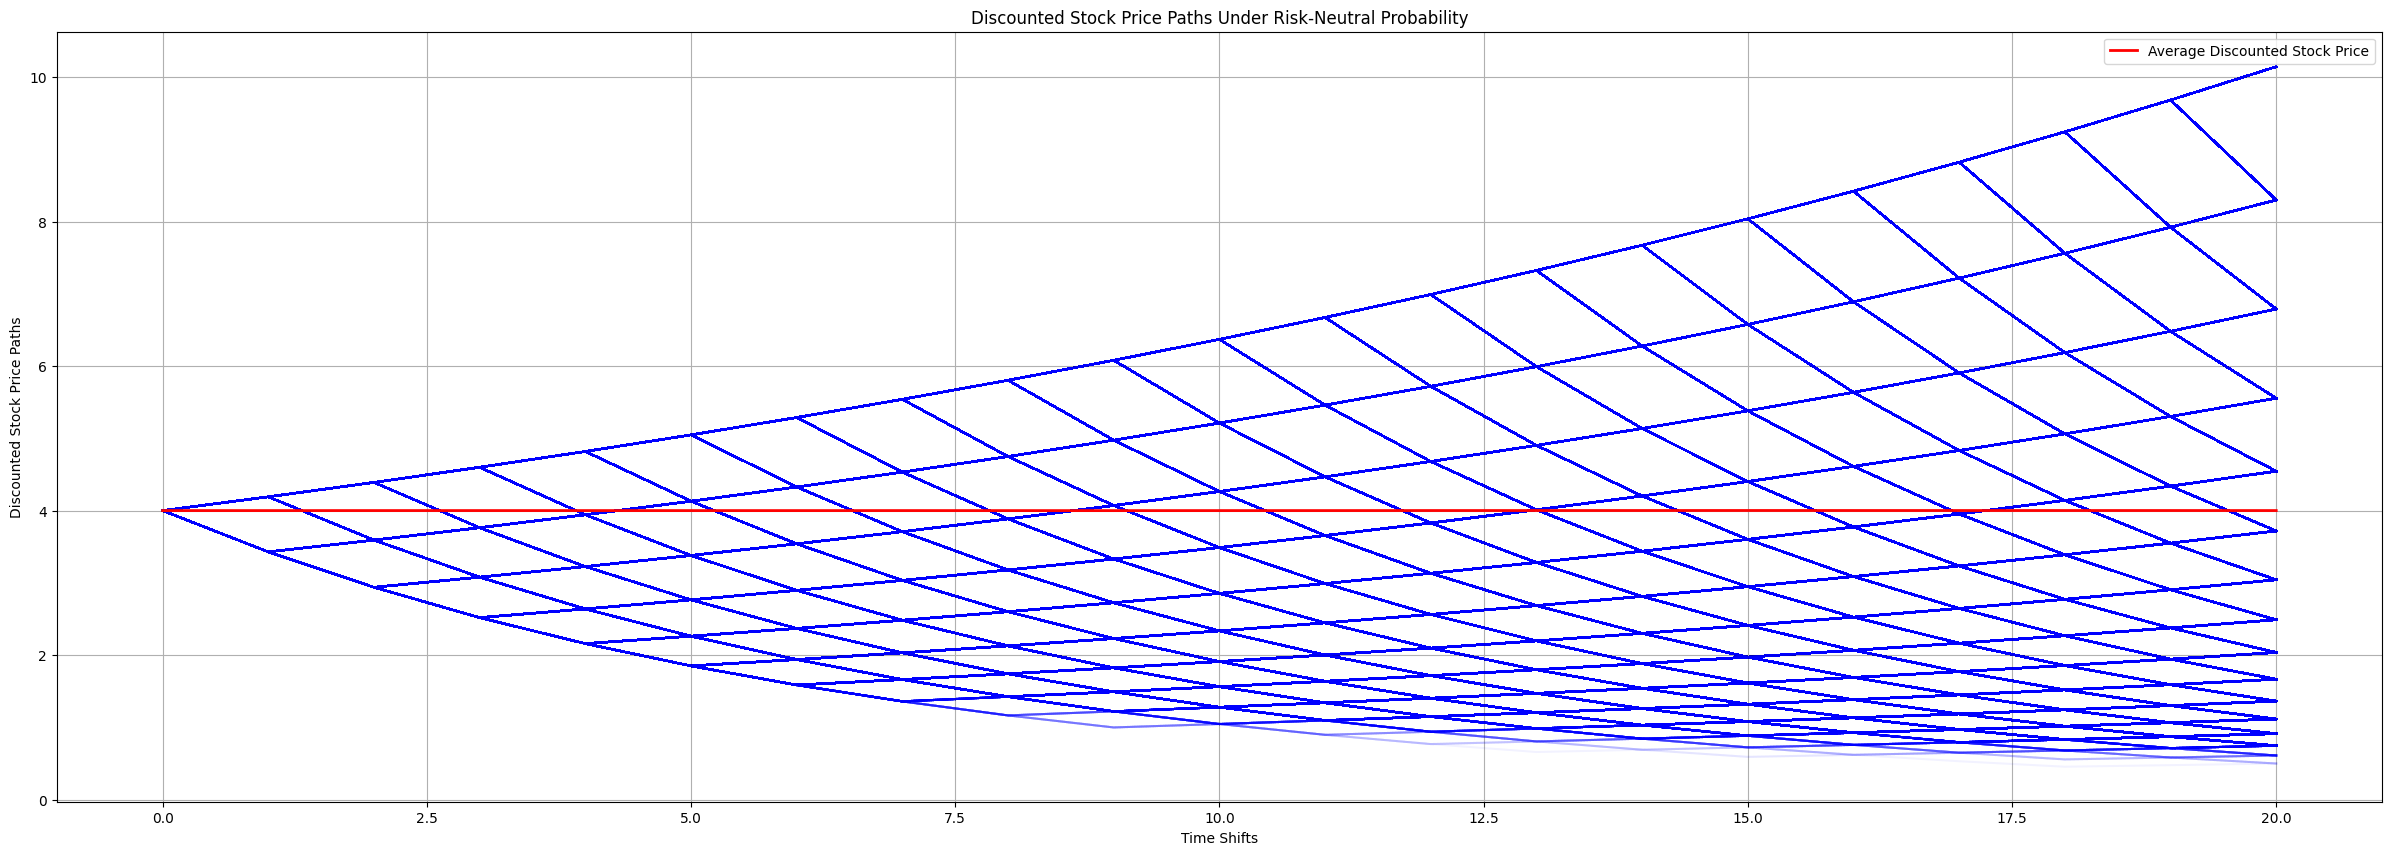

In [11]:
import matplotlib.pyplot as plt

def graph_data(price_paths, average_path, ylabel, title, average_line_label, max_y=None):
    plt.figure(figsize=(30, 10))
    if max_y != None:
        plt.ylim(top=max_y)
    for i in range(num_paths):
        plt.plot(price_paths[i], color='blue', alpha=0.05)
    plt.plot(average_path, color='red', linewidth=2, label=average_line_label)
    plt.xlabel('Time Shifts')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

graph_data(price_paths, average_price_path, 'Discounted Stock Price Paths', 'Discounted Stock Price Paths Under Risk-Neutral Probability', 'Average Discounted Stock Price')

As you can see, the average discounted stock price is roughly equal to $S_0$, showing that discounted stock price under risk-neutral probability is a martingale. Now, I will show how applying a convex function to the discounted stock price will make it **submartingale**.

## The Convex Function

One way to turn a martingale process, such as discounted stock price under risk neutral probability, into a **submartingale** process is to apply a convex function to the martingale process. A **submartingale** process is a process that tends to go up with time. Discounted stock price under risk neutral probability as a **submartingale** can be defined as $\:\frac{S_n}{(1+r)^n}\:\leq\:\tilde{\mathbb{E}}[\frac{S_{n+1}}{(1+r)^{n+1}}]$. For this simulation I will apply the simple convex function $y = e^x$ to the data by using the numpy method `np.exp` on `all_price_paths`.

In [12]:
price_paths = np.exp(price_paths)
price_paths

array([[ 54.59815003,  66.05423787,  80.64224758, ...,  62.87465237,
         76.58034031,  41.20573629],
       [ 54.59815003,  30.83256475,  36.30068947, ...,  29.61283821,
         34.79769775,  20.95699501],
       [ 54.59815003,  66.05423787,  80.64224758, ...,  62.87465237,
         76.58034031,  94.15365049],
       ...,
       [ 54.59815003,  66.05423787,  80.64224758, ..., 157.8108433 ,
         76.58034031,  94.15365049],
       [ 54.59815003,  30.83256475,  18.89269823, ...,  15.99330463,
         18.25024086,  12.05278395],
       [ 54.59815003,  30.83256475,  36.30068947, ...,  29.61283821,
         34.79769775,  20.95699501]])

And, we will once again calculate the average of all the paths in `all_price_paths`. Remember, in order for this process to be martingale all the numbers in the array have to be roughly the same.

In [13]:
average_price_path = np.mean(price_paths, axis=0)
average_price_path

array([ 54.59815003,  57.24104351,  60.15812082,  63.3458238 ,
        66.88308237,  70.78152922,  75.14658501,  80.05046196,
        85.53753271,  91.6583209 ,  98.72124298, 106.79508712,
       116.13627107, 126.91571725, 139.49136387, 154.44457447,
       172.02785356, 193.34414726, 219.46166999, 251.18652006,
       290.7036899 ])

And, lastly, we will graph the data using the function `graph_data` which I created earlier. For this graph I will cap the Y axis at $2500$ although it really goes all the way up to around $25000$ as the change in the average line is barely visible otherwise.

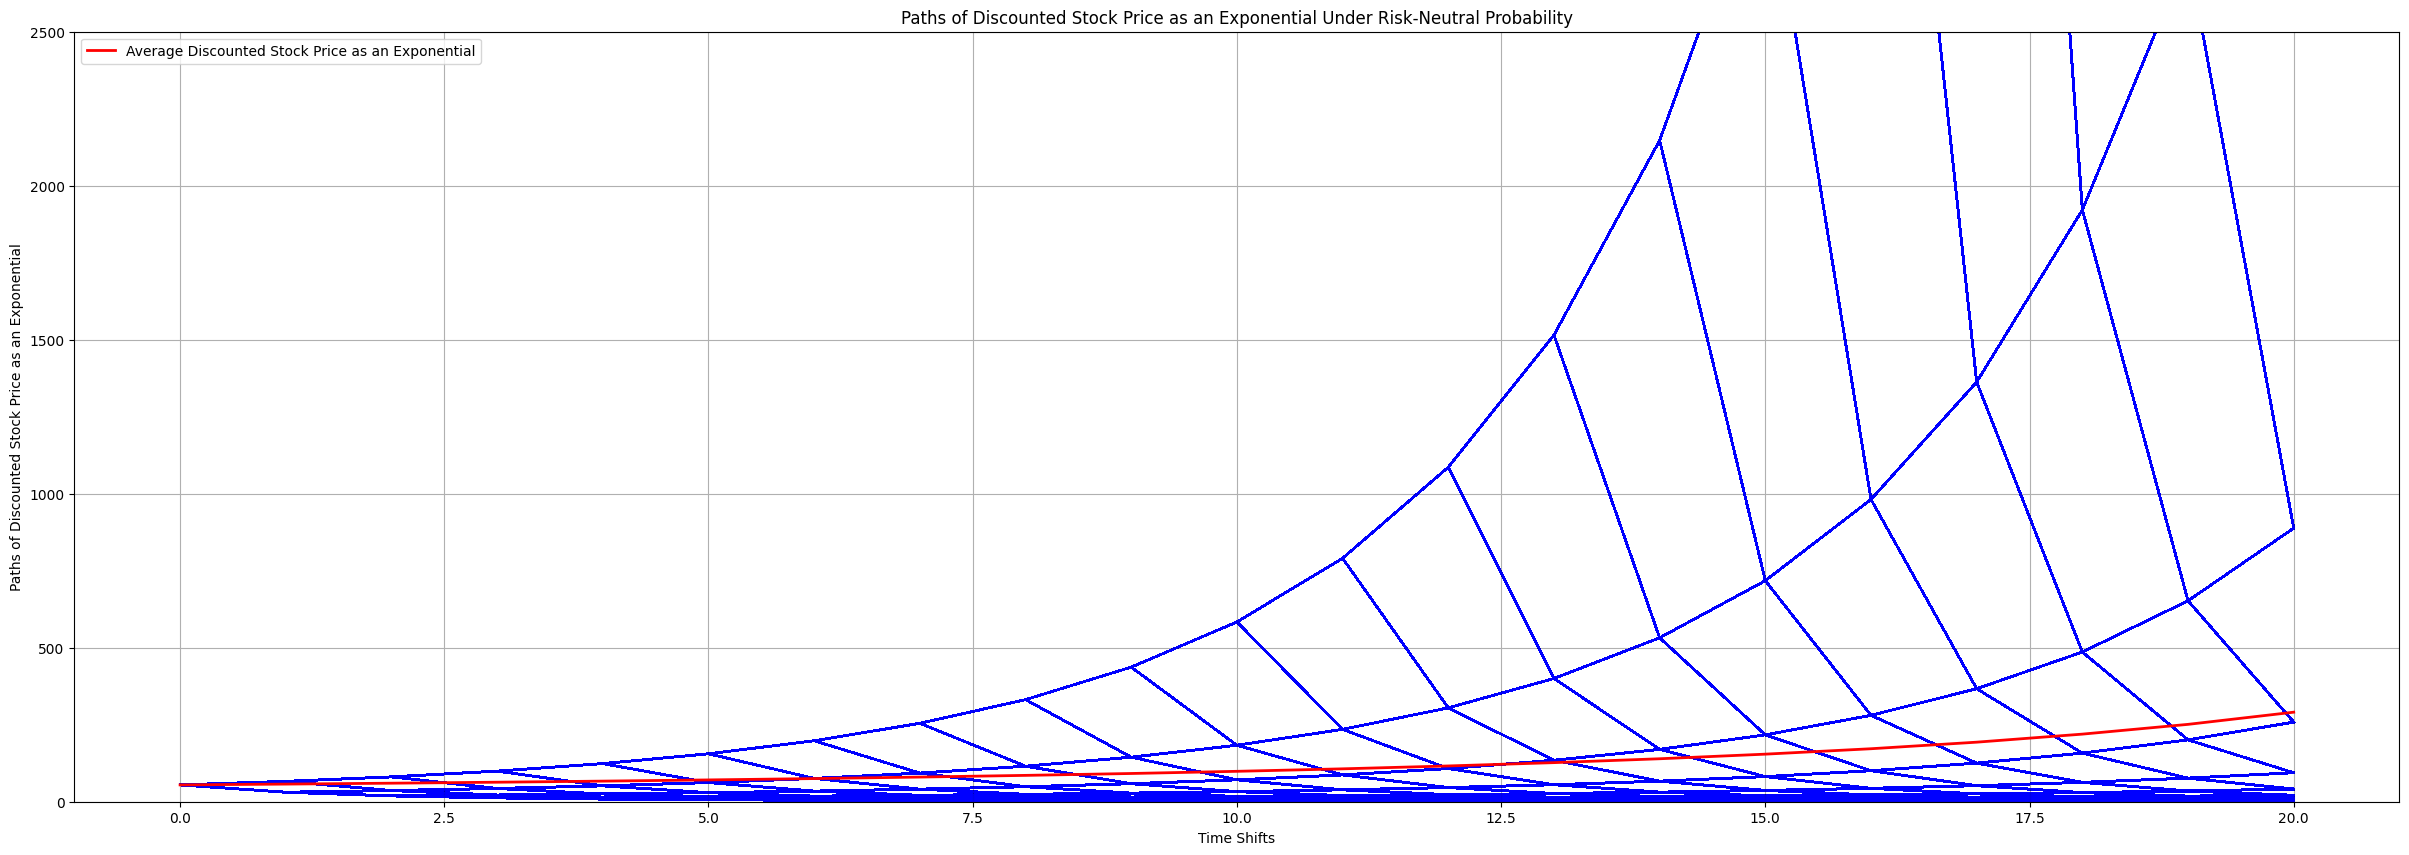

In [14]:
graph_data(price_paths, average_price_path, 'Paths of Discounted Stock Price as an Exponential', 'Paths of Discounted Stock Price as an Exponential Under Risk-Neutral Probability', 'Average Discounted Stock Price as an Exponential', max_y=2500.0)

As you can see, applying the concave function $e^x$ to `all_price_paths` makes the martingale process of discounted stock prices under risk-neutral probabilities a submartingale process as the average price line has an upward trend.